In [ ]:
!pip install sympy
!pip install ipywidgets

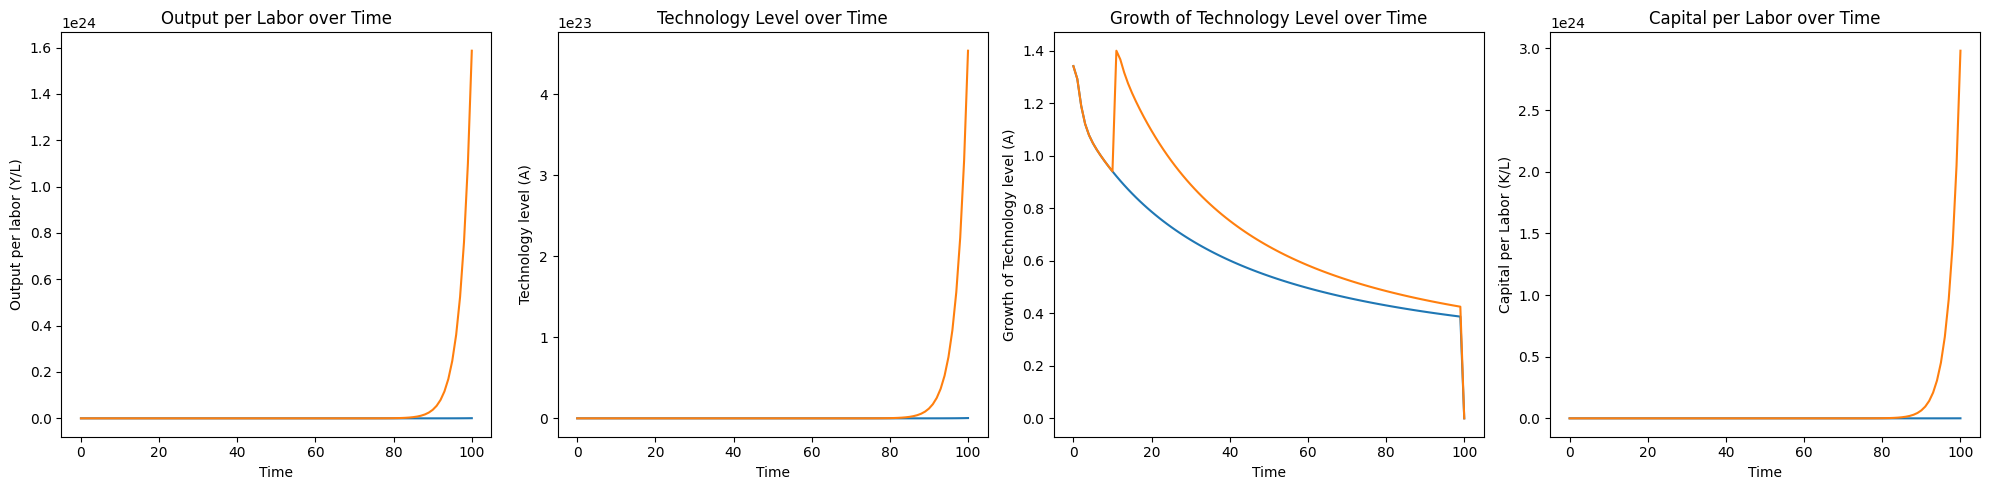

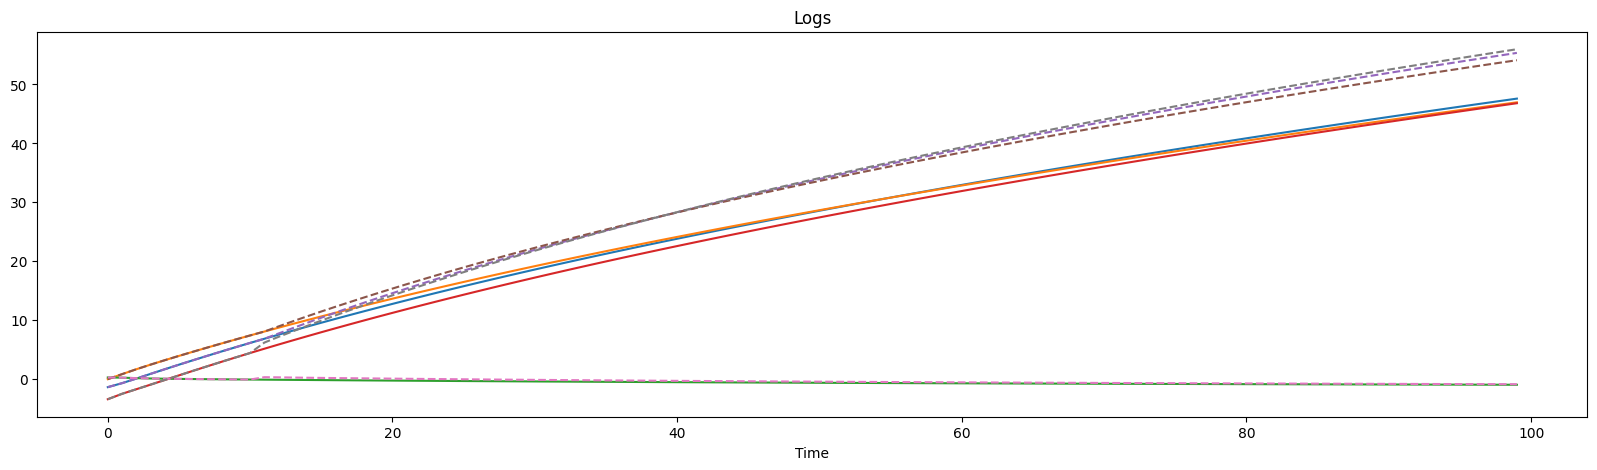

In [42]:
# From https://github.com/duda40s/EndogenousGrowth/blob/main/endogenousmodelR&Dcapital2.py

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import ipywidgets
import math

def RD_growth_model(n=.02, gamma=.7, theta=.5, beta=.4, alpha=.35, L0=30, A0=1, T=16, s=.2, K0=1, a=.15, B=1, shock={}):

    X = np.arange(T + 1)

    Lpath = np.zeros(T + 1)
    Apath = np.zeros(T + 1)
    Ypath = np.zeros(T + 1)
    Kpath = np.zeros(T + 1)
    YLpath = np.zeros(T + 1)
    AGpath = np.zeros(T + 1)
    KLpath = np.zeros(T + 1)
    Lpath_shock = np.zeros(T + 1)
    Apath_shock = np.zeros(T + 1)
    Ypath_shock = np.zeros(T + 1)
    Kpath_shock = np.zeros(T + 1)
    YLpath_shock = np.zeros(T + 1)
    AGpath_shock = np.zeros(T + 1)
    KLpath_shock = np.zeros(T + 1)

    Y0 = ((A0*L0*(1 - a))**(1-alpha)) * (K0*(1 - a))**(alpha)
    Y0_shock = Y0

    Lpath[0] = L0
    Apath[0] = A0
    Ypath[0] = Y0
    Kpath[0] = K0
    YLpath[0] = Y0/L0
    KLpath[0] = K0/L0
    Lpath_shock[0] = L0
    Apath_shock[0] = A0
    Ypath_shock[0] = Y0
    Kpath_shock[0] = K0
    YLpath_shock[0] = Y0/L0
    KLpath_shock[0] = K0/L0

    theta_shock = theta
    beta_shock = beta
    alpha_shock = alpha
    a_shock = a
    B_shock = B
    gamma_shock = gamma
    n_shock = n
    s_shock = s

    for t in range(T):
        Adot = ((a * Lpath[t])**gamma) * B*((Kpath[t] * a)**beta) * Apath[t]**theta
        Apath[t + 1] = Apath[t] + Adot
        AGpath[t] = Adot / Apath[t]

        Ydot = ((Apath[t]*Lpath[t]*(1 - a))**(1-alpha)) * (Kpath[t]*(1 - a))**alpha
        Ldot = n * Lpath[t]
        Lpath[t+1] = Ldot + Lpath[t]

        Ypath[t + 1] = Ypath[t] + Ydot
        Kdot = s * Ypath[t]
        Kpath[t + 1] = Kpath[t] + Kdot

        YLpath[t + 1] = Ypath[t + 1] / Lpath[t + 1]
        KLpath[t + 1] = Kpath[t + 1] / Lpath[t + 1]

        if 't' in shock and shock['t'] == t:
            if 'theta' in shock:
                theta_shock = shock['theta']
            if 'beta' in shock:
                beta_shock = shock['beta']
            if 'alpha' in shock:
                alpha_shock = shock['alpha']
            if 'a' in shock:
                a_shock = shock['a']
            if 'B' in shock:
                B_shock = shock['B']
            if 'gamma' in shock:
                gamma_shock = shock['gamma']
            if 'n' in shock:
                n_shock = shock['n']
            if 's' in shock:
                s_shock = shock['s']

        Adot_shock = ((a_shock * Lpath_shock[t])**gamma_shock) * B_shock*((Kpath_shock[t] * a_shock)**beta_shock) * Apath_shock[t]**theta_shock
        Apath_shock[t + 1] = Apath_shock[t] + Adot_shock
        AGpath_shock[t] = Adot_shock / Apath_shock[t]

        Ydot_shock = ((Apath_shock[t]*Lpath_shock[t]*(1 - a_shock))**(1-alpha_shock)) * (Kpath_shock[t]*(1 - a_shock))**alpha_shock
        Ldot_shock = n_shock * Lpath_shock[t]
        Lpath_shock[t+1] = Ldot_shock + Lpath_shock[t]

        Ypath_shock[t + 1] = Ypath_shock[t] + Ydot_shock
        Kdot_shock = s_shock * Ypath_shock[t]
        Kpath_shock[t + 1] = Kpath_shock[t] + Kdot_shock

        YLpath_shock[t + 1] = Ypath_shock[t + 1] / Lpath_shock[t + 1]
        KLpath_shock[t + 1] = Kpath_shock[t + 1] / Lpath_shock[t + 1]

    # GA = ((beta+gamma)/(1-(theta+beta)))*n
    # GA_shock = ((beta_shock+gamma_shock)/(1-(theta_shock+beta_shock)))*n_shock

    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    axs[0].plot(X, YLpath)
    axs[0].plot(X, YLpath_shock)
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Output per labor (Y/L)')
    axs[0].set_title('Output per Labor over Time')

    axs[1].plot(X, Apath)
    axs[1].plot(X, Apath_shock)
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Technology level (A)')
    axs[1].set_title('Technology Level over Time')

    axs[2].plot(X, AGpath)
    axs[2].plot(X, AGpath_shock)
    axs[2].set_xlabel('Time')
    axs[2].set_ylabel('Growth of Technology level (A)')
    axs[2].set_title('Growth of Technology Level over Time')

    axs[3].plot(X, KLpath)
    axs[3].plot(X, KLpath_shock)
    axs[3].set_xlabel('Time')
    axs[3].set_ylabel('Capital per Labor (K/L)')
    axs[3].set_title('Capital per Labor over Time')

    plt.tight_layout()
    plt.show()


    fig, axs = plt.subplots(figsize=(20, 5))

    axs.plot(X[:-1], [math.log(i) for i in YLpath[:-1]], label='YLpath')
    axs.plot(X[:-1], [math.log(i) for i in Apath[:-1]], label='Apath')
    axs.plot(X[:-1], [math.log(i) for i in AGpath[:-1]], label='AGpath')
    axs.plot(X[:-1], [math.log(i) for i in KLpath[:-1]], label='KLpath')
    axs.plot(X[:-1], [math.log(i) for i in YLpath_shock[:-1]], linestyle='dashed', label='YLpath_shock')
    axs.plot(X[:-1], [math.log(i) for i in Apath_shock[:-1]], linestyle='dashed', label='Apath_shock')
    axs.plot(X[:-1], [math.log(i) for i in AGpath_shock[:-1]], linestyle='dashed', label='AGpath_shock')
    axs.plot(X[:-1], [math.log(i) for i in KLpath_shock[:-1]], linestyle='dashed', label='KLpath_shock')
    axs.set_xlabel('Time')
    axs.set_title('Logs')
    plt.show()

RD_growth_model(0.02, 0.7, 0.5, 0.4, 0.35, 30, 1, 100, 0.20, 1, 0.15, 1, {'s' : 0.9, 't': 10})


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image

NUM_FRAMES = 25

def k_next(k_t, alpha, n, g, rho):
    return ((1-alpha)*k_t**alpha)/((1+n)*(1+g)*(1+rho))

def plot_phase(alpha=.03, n=.02, g=.02, rho=.04, color='blue', linestyle='-', legend=False, subtitle=''):
    k_vals = np.linspace(0.01, 1, 100)
    k_next_vals = [k_next(k, alpha, n, g, rho) for k in k_vals]

    plt.plot(k_vals, k_next_vals, label=f"α={alpha}" if legend else None, color=color, linestyle=linestyle)
    plt.plot(k_vals, k_vals, label="$k_t=k_{t+1}$" if legend else None, color='orange', linestyle='dotted')
    plt.xlabel('$k_t$')
    plt.ylabel('$k_{t+1}$')
    plt.title('Plot of $k_{t+1}$ against $k_t$ ' +  subtitle)
    plt.grid(True)
    plt.xlim(0,1)
    plt.ylim(0,1)
    if legend:
        plt.legend()

def animate(alpha, n, g, rho, shock={}, output_file='diamond.gif'):
    shock_str = ', '.join([f'{k}={v}' for k, v in shock.items()])
    def update(frame):
        shocked = {}
        if 'alpha' in shock:
            shocked['alpha'] = alpha + (shock['alpha'] - alpha) * frame / NUM_FRAMES
        else:
            shocked['alpha'] = alpha
        if 'n' in shock:
            shocked['n'] = n + (shock['n'] - n) * frame / NUM_FRAMES
        else:
            shocked['n'] = n
        if 'g' in shock:
            shocked['g'] = g + (shock['g'] - g) * frame / NUM_FRAMES
        else:
            shocked['g'] = g
        if 'rho' in shock:
            shocked['rho'] = rho + (shock['rho'] - rho) * frame / NUM_FRAMES
        else:
            shocked['rho'] = rho
        plt.clf()
        plot_phase(alpha, n, g, rho, color='gray')
        plot_phase(shocked['alpha'], shocked['n'], shocked['g'], shocked['rho'], linestyle='--', legend=True, subtitle=f'- shocks=({shock_str})')

    # Set up the initial plot
    fig, ax = plt.subplots(figsize=(10, 10))

    # Set up the animation
    ani = FuncAnimation(fig, update, frames=range(NUMmocha_FRAMES), repeat=True)

    # Saving the video
    ani.save(output_file, writer='pillow')
    plt.close(fig)


animate(alpha=.3,n=.02,g=.02,rho=.04, shock={'alpha': .7})
animate(alpha=.3,n=.02,g=.02,rho=.04, shock={'n': .05}, output_file='diamond_n.gif')
Image(filename='diamond.gif')


![](https://github.com/deodoro/macro_models/blob/main/diamond.gif?raw=true)
![](https://github.com/deodoro/macro_models/blob/main/diamond_n.gif?raw=true)